# __Mouvement rétrograde de Mars__ - Ben Lichtfeld SPRINTB


## __Introduction__
Le mouvement rétrograde des planètes est une apparence visuelle due à la perspective depuis la Terre, où une planète semble inverser brièvement sa trajectoire dans le ciel. C'est le cas pour Mars : tous les deux ans, la planète semble faire un bref demi-tour, phénomène observé depuis l'Antiquité. Ce phénomène se produit lorsque la Terre, se déplaçant sur une orbite plus rapide, dépasse une planète extérieure comme Mars. Vu depuis la Terre, la position apparente de la planète semble alors ralentir, s'inverser brièvement, puis reprendre sa trajectoire habituelle dans le ciel. Nous allons alors adapter un modèle reproduisant ce phénomène puis nous comparerons notre résultat au phénomène observé.

## __1. Rappels théoriques__
Avant de nous attaquer au problème, rappelons quelques éléments qui vont nous aider à modéliser la situation.  
Pour un mouvement circulaire uniforme de rayon $R$, de période $T$ et de phase à l'origine $\phi$, les équations du mouvement s'écrivent:
$$X_i(t)=Rcos(\omega_i t+\phi_i)$$
$$Y_i(t)=Rsin(\omega_i t+\phi_i)$$
où $\omega_i = \frac{2\pi}{T_i}$ représente la vitesse angulaire.

À la date t=0, l'angle que fait le vecteur position avec l'axe x est l'angle $\phi_{i}$, car $X(0)=Rcos(\phi_i)$.
Ainsi, à t=0, __l'objet pointe dans la direction faisant un angle $\phi$ par rapport à l'axe__ x, qui est positif dans le sens trigonométrique.

## __2. Hypothèses__
- Afin de simplifier le problème, nous allons considérer que la Terre et Mars ont chacun __un mouvement circulaire__ (dû à leur excentricité faible) et __uniforme__. Les équations vues précédemment s'appliquent donc aux deux planètes.  
- Les orbites des deux planètes sont __considérées dans un plan commun (l'écliptique)__, sans inclinaison mutuelle : l'inclinaison de l'orbite de Mars par rapport à celle de la Terre est d’environ 1.85°, ce qui est néglieable pour les calculs de longitudes apparentes.
- Le système est décrit dans un __référentiel centré sur le Soleil__ (héliocentrique), et la rétrogradation est ensuite calculée dans le référentiel géocentrique. Le mouvement de Mars vu depuis la Terre peut ainsi être déduit grâce à leurs __positions respectives dans le système solaire__ (on y reviendra par la suite).
- On considère les planètes comme des __points ponctuels__ : les dimensions physiques des planètes (taille, volume...) n'ont pas d'impact sur les calculs liés à leurs positions dans le système solaire. 

## __3. Méthode__
L'objectif est d'obtenir la __longitude apparente__ de Mars dans le référentiel géocentrique (i.e. l’angle $\phi_{app}$ que fait Mars par rapport à l’axe x depuis la Terre) en fonction du temps. Nous pourrons ensuite comparer ce modèle aux données mesurées.  
Soit $X_M$ et $Y_M$ les positions de Mars en fonction du temps. Soit $X_T$ et $Y_T$ les positions de la Terre en fonction du temps. Nous appelons $X_{app}$ et $Y_{app}$ les positions relatives de Mars en fonction du temps vues depuis la Terre. L'angle $\phi_{app}$ s'obtient comme suit :

Nous savons que $$tan(\phi_{app}) = \frac{Y_{app}}{X_{app}}$$ $$\Leftrightarrow$$ $$\phi_{app}=arctan(\frac{Y_{app}}{X_{app}})$$  
où $Y_{app}=Y_M-Y_T$ et $X_{app}=X_M-X_T$
Puisque la fonction `numpy.arctan(y / x)` donne un résultat entre −𝜋/2 et 𝜋/2, nous allons utiliser la fonction `numpy.arctan2(y, x)` qui donne un résultat entre −𝜋 et 𝜋 car elle nous renvoie des valeurs de degrés plus représentatives du problème.

Nous allons ensuite __fixer notre phase à l'origine__.
Nous savons qu'à la date du 25 mai 2016, nous arrivons au milieu du mouvement rétrograde de Mars. À cet instant, la Terre, Mars et le Soleil sont parfaitement allignés. __Les angles $\phi_M$ et $\phi_T$ sont donc égaux__ à cet instant. Nous allons donc choisir notre temps à l'origine à cette date précise (expliqué plus en détail dans le code).

Après avoir tracé le graphique représentant la longitude apparente en fonction du temps de notre modèle, nous allons représenter celui du fichier `DataMars.csv` et les comparer.

### __3.1 Importation des bibliothèques et lecture de données__
Nous allons tout d'abord importer les bibliothèques nécessaires à notre projet.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Nous disposons d'un fichier `DataMars.csv` qui contient les données astronomiques (observées) du phénomène étudié.
Nous allons le lire afin de pouvoir comparer notre modèle à celui-ci.

In [28]:
Mars = pd.read_csv('DataMars.csv', comment='#')  #on ouvre le csv sans afficher les lignes commençant par #

### __3.2 Définition des paramètres__
Voici les grandeurs utiles à notre problème :  
- **le rayon de l'orbite de la Terre** $R_T= $ 1 UA
- **le rayon de l'orbite de Mars** $R_M= $ 1.52371 UA
- **la période de révolution de la Terre** $T_{Terre}=$ 365.25 jours
- **la période de révolution de Mars** $T_{Mars}=$ 686.885 jours

In [29]:
#définition des paramètres
R_T=1
T_Terre=365.25
w_T=2*np.pi/T_Terre 
R_M=1.52371  
T_Mars=686.885
w_M=2*np.pi/T_Mars 

### __3.3 Modélisation__
Nous tracons d'abord un modèle brut.

In [30]:
#extraction des données
Mars['Date'] = pd.to_datetime(Mars['Date']) #convertit les éléments de la colonne Date en objet de type datetime
t0 = pd.to_datetime('2016-05-25') 
Mars['Jours'] = (Mars['Date'] - t0).dt.days
#crée une nouvelle colonne dans le DataFrame Mars.
#les jours sont 'négatifs' avant le 25 mai 2016
#chaque valeur représente le nombre de jours écoulés depuis le 25 mai 2016 pour la date correspondante dans la colonne Date.

In [31]:
#Equations du mouvement
phi_T=np.deg2rad(240.5) #pour t=0, phi = 240.5 degrés
phi_M=np.deg2rad(240.5)
X_Terre=R_T*np.cos(w_T*Mars['Jours']+phi_T)
Y_Terre=R_T*np.sin(w_T*Mars['Jours']+phi_T)
X_Mars=R_M*np.cos(w_M*Mars['Jours']+phi_M)
Y_Mars=R_M*np.sin(w_M*Mars['Jours']+phi_M)

#calcul de la longitude apparente
Y_app=Y_Mars-Y_Terre
X_app=X_Mars-X_Terre
longitude_apparente = np.rad2deg(np.arctan2(Y_app,X_app))
longitude_apparente = (longitude_apparente + 360) % 360  #les valeurs d'angle sont comprises entre 0 et 2pi.

#### __Graphique Brut__

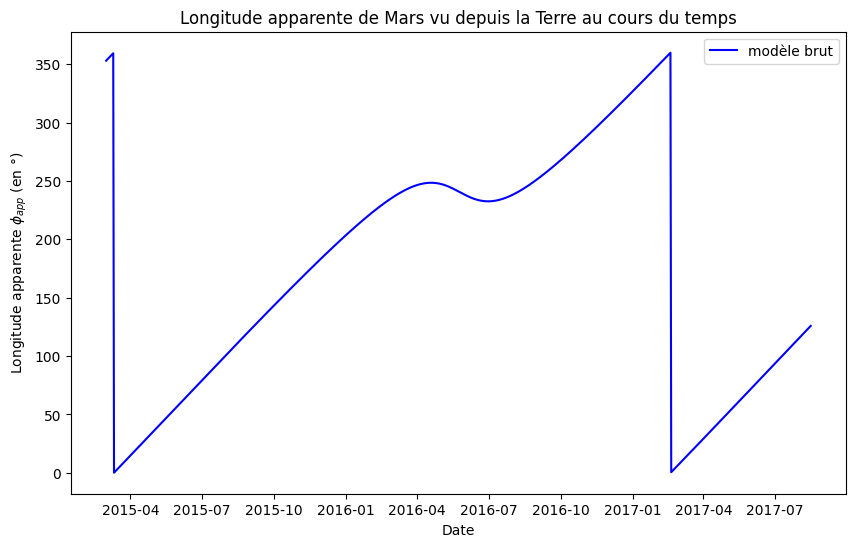

In [32]:
#tracé du graphique
plt.figure(figsize=(10, 6))
plt.plot(Mars['Date'], longitude_apparente, 'b', label='modèle brut')
plt.xlabel('Date')
plt.ylabel('Longitude apparente $\phi_{app}$ (en °)')
plt.title('Longitude apparente de Mars vu depuis la Terre au cours du temps')
plt.legend()
plt.show()

### __Résultat__
Nous allons ensuite sélectionner uniquement __les valeurs de date où se trouve le mouvement rétrograde et ajouter la data__.

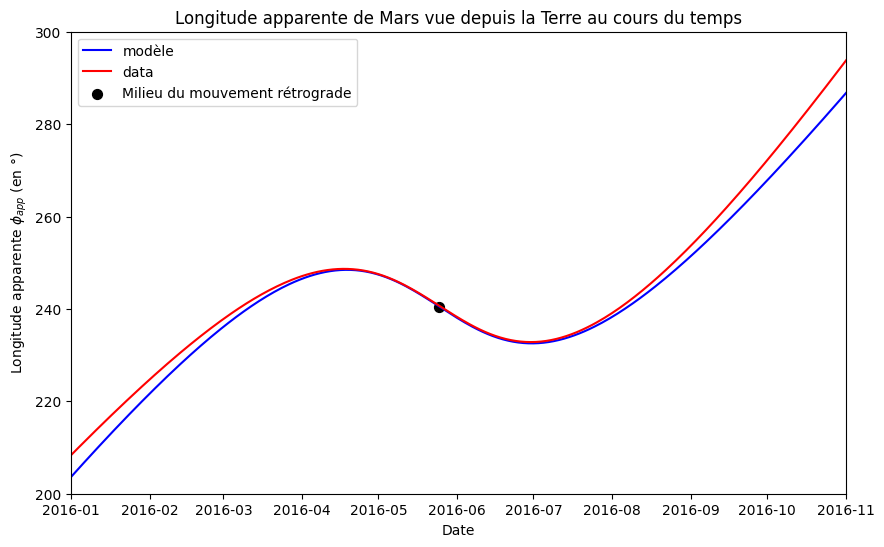

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(Mars['Date'], longitude_apparente, 'b', label='modèle')
plt.plot(Mars['Date'], Mars['Longitude (decimal)'], 'r', label='data')
plt.xlabel('Date')
plt.ylabel('Longitude apparente $\phi_{app}$ (en °)')
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2016-11-1')) #on sélectionne une tranche de date spécifique
plt.ylim(200,300)
plt.scatter(pd.Timestamp('2016-05-25'), 240.5, color='black', s =50, label='Milieu du mouvement rétrograde')
plt.title('Longitude apparente de Mars vue depuis la Terre au cours du temps')
plt.legend()
plt.show()

### __Description et analyse du résultat__

On distingue plusieurs phases sur la courbe : 
- __Avant mai 2016__ (Mouvement directe) :  
  La courbe a une __pente positive__ (croissance régulière de la longitude apparente). Cela indique que Mars semble se déplacer dans le ciel dans sa direction normale, avant d’entrer en mouvement rétrograde.

- __Autour de mai 2016__ (Rétrogradation) :  
  On observe un __ralentissement__, suivi d’une __inflexion__ de la courbe. À ce moment, Mars semble s’arrêter (stationnement apparent) et commence à se déplacer dans la direction opposée, créant l’effet rétrograde.
    Le point noir marque l'instant où la rétrogradation atteint son milieu : la Terre dépasse Mars dans leurs orbites respectives autour du Soleil.

- __Après mai 2016__ (Retour au mouvement direct) :
  La courbe reprend une pente positive après le mouvement rétrograde, indiquant que Mars revient à un mouvement direct vu depuis la Terre.

## __4. Discussion du résultat et conclusion__
Nous voyons que le modèle approxime assez bien la data. Le resserrement par moments et le décalage à d’autres s’expliquent principalement par __la différence entre les orbites réelles__ qui sont elliptiques (1ère Loi de Kepler) __et le modèle__ (orbites circulaires). De plus, __la lattitude n'a pas été prise en compte__ dans notre modèle et elle peut l'affecter légèrement ce qui explique également cette différence. Afin d'améliorer notre modèle, nous aurions donc pu inclure ces légères différences.  
Nous sommes donc parvenu à représenter le mouvement rétrograde de Mars par un modèle simple qui est __cohérent et qui approxime bien la réalité__.